# Case Study - Spam Detection

The main aim of this project is to demonstrate the basics of Natural Language Processing (NLP).

**Major Steps Involved:**
1. **Text Data Visualisation**
2. **Text Data Preprocessing**
3. **Text Data To Numerical Vector Conversion using:**
  - **Word2Vec**
  - **Pretrained GloVe**
  - **Pretrained BERT**

We will follow the steps mentioned below:

1. Data Loading
2. Exploratory Data Analysis
3. Data Preparation
    - Train Test Split
    - Data Preprocessing (special characters, stop words, lower case, stemming, etc)
    - Converting text to numerical vector using Word2Vec, Pretrained GloVe and BERT
    - Preprocessing Test Data
4. Training on Train Data
5. Predictions on Test Data
6. Model Evaluation

In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

In [142]:
df = pd.read_csv('  ', header=None, names=['text', 'label'])

df['label'].value_counts()


,count
label,


In [143]:
df.shape

(5729, 2)

### Exploratory Data Analysis

In [144]:
df['label'].value_counts()

,count
label,


In [145]:
df['label'].value_counts(normalize=True)

,proportion
label,


<Axes: xlabel='label', ylabel='count'>

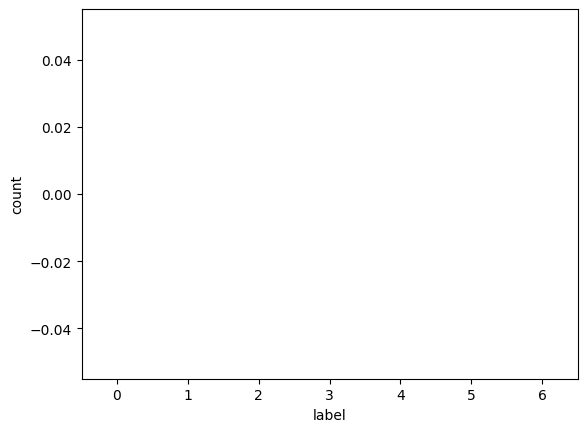

In [146]:
sns.countplot(x='label', data=df)

### Data Preparation - Split the data into train and test set

In [147]:
df.columns

Index(['text', 'label'], dtype='object')

In [148]:
y = df['label']
X = df[['text']]

In [149]:
# df = df.drop('Unnamed: 0', axis=1)

df.head()

,text,label
text,spam,NaN
"Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo , stylish statlonery and outstanding website will make the task much easier . we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader : it isguite ciear that without good products , effective business organization and practicable aim it will be hotat nowadays market ; but we do promise that your marketing efforts will become much more effective . here is the list of clear benefits : creativeness : hand - made , original logos , specially done to reflect your distinctive company image . convenience : logo and stationery are provided in all formats ; easy - to - use content management system letsyou change your website content and even its structure . promptness : you will see logo drafts within three business days . affordability : your marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction guaranteed : we provide unlimited amount of changes with no extra fees for you to be surethat you will love the result of this collaboration . have a look at our portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _",1,NaN
Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no,1,NaN
"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended to you unconditionally and your credit is in no way a factor . to take advantage of this limited time opportunity all we ask is that you visit our website and complete the 1 minute post approval form look foward to hearing from you , dorcas pittman",1,NaN
"Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com request additional information now ! click here click here for a printable version of our order form ( pdf format ) golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation .",1,NaN


In [150]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
X_train.head()

,text
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",0
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",0
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",0
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",1
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c 2 mike roberts 9 : 30 am ebl 9 c 2 please mark your calendars . thanks ! shirley molly : do you have copies of the resumes for these two and the others that are being interviewed today and tomorrow ? thanks !",0


In [152]:
X_train.shape

(4583, 1)

### Data Prepration - Text Preprocessing

In [153]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [154]:
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [155]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [156]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [157]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [158]:
# %%timeit

# # Convert to series
# X_train['text'].apply(lambda x: preprocess(x, 'stem'))

# # 2min 35 sec approx run time

In [159]:
# !pip install tqdm

In [160]:
from tqdm import tqdm, tqdm_notebook

In [161]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [162]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

100%|██████████| 4583/4583 [00:00<00:00, 7774.98it/s] 


,0,1
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",,0
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",,0
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",,0
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",,0
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c 2 mike roberts 9 : 30 am ebl 9 c 2 please mark your calendars . thanks ! shirley molly : do you have copies of the resumes for these two and the others that are being interviewed today and tomorrow ? thanks !",,0


In [163]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",,0
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",,0
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",,0
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",,0
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c 2 mike roberts 9 : 30 am ebl 9 c 2 please mark your calendars . thanks ! shirley molly : do you have copies of the resumes for these two and the others that are being interviewed today and tomorrow ? thanks !",,0


In [164]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,text,clean_text_stem,text_length_stem
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",0,,0
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",0,,0
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",0,,0
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",1,,0
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c 2 mike roberts 9 : 30 am ebl 9 c 2 please mark your calendars . thanks ! shirley molly : do you have copies of the resumes for these two and the others that are being interviewed today and tomorrow ? thanks !",0,,0


In [165]:
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████| 4583/4583 [00:00<00:00, 6477.93it/s]


,0,1
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",,0
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",,0
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",,0
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",,0
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c 2 mike roberts 9 : 30 am ebl 9 c 2 please mark your calendars . thanks ! shirley molly : do you have copies of the resumes for these two and the others that are being interviewed today and tomorrow ? thanks !",,0


In [166]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",,0
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",,0
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",,0
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",,0
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c 2 mike roberts 9 : 30 am ebl 9 c 2 please mark your calendars . thanks ! shirley molly : do you have copies of the resumes for these two and the others that are being interviewed today and tomorrow ? thanks !",,0


In [167]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",0,,0,,0
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",0,,0,,0
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",0,,0,,0
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",1,,0,,0
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c 2 mike roberts 9 : 30 am ebl 9 c 2 please mark your calendars . thanks ! shirley molly : do you have copies of the resumes for these two and the others that are being interviewed today and tomorrow ? thanks !",0,,0,,0


In [168]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",0,,0,,0
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",0,,0,,0
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",0,,0,,0
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",1,,0,,0
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c 2 mike roberts 9 : 30 am ebl 9 c 2 please mark your calendars . thanks ! shirley molly : do you have copies of the resumes for these two and the others that are being interviewed today and tomorrow ? thanks !",0,,0,,0


### Creating the WordCloud for Spam Emails

In [169]:
# !pip install wordcloud

In [170]:
from wordcloud import WordCloud

In [171]:
y_train

,label
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",NaN
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",NaN
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",NaN
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",NaN
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c 2 mike roberts 9 : 30 am ebl 9 c 2 please mark your calendars . thanks ! shirley molly : do you have copies of the resumes for these two and the others that are being interviewed today and tomorrow ? thanks !",NaN
...,...
"Subject: maureen raymoin ' ds review norma , maureen raymond refuses to sign her review . can you , please , j

In [172]:
spam_df = X_train.loc[y_train=='spam', :]

spam_df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma


In [173]:
words = ' '.join(spam_df['clean_text_lemma'])

print(words[:100])

In [174]:
# spam_df = X_train.loc[y_train=='spam', :]

# words = ' '.join(spam_df['clean_text_lemma'])

# cleaned_word = " ".join([word for word in words.split()
#                         if 'subject' not in word])

In [175]:
spam_df = X_train.loc[y_train=='spam', :]

words = ' '.join(spam_df['clean_text_lemma'])

# Remove 'subject' and also empty strings using filter
cleaned_word = " ".join(filter(None, [word for word in words.split()
                        if 'subject' not in word]))

# Check if cleaned_word is still empty and if so, add a placeholder word
if not cleaned_word:
    cleaned_word = "placeholder" # or any word you want in wordcloud if string is empty

spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

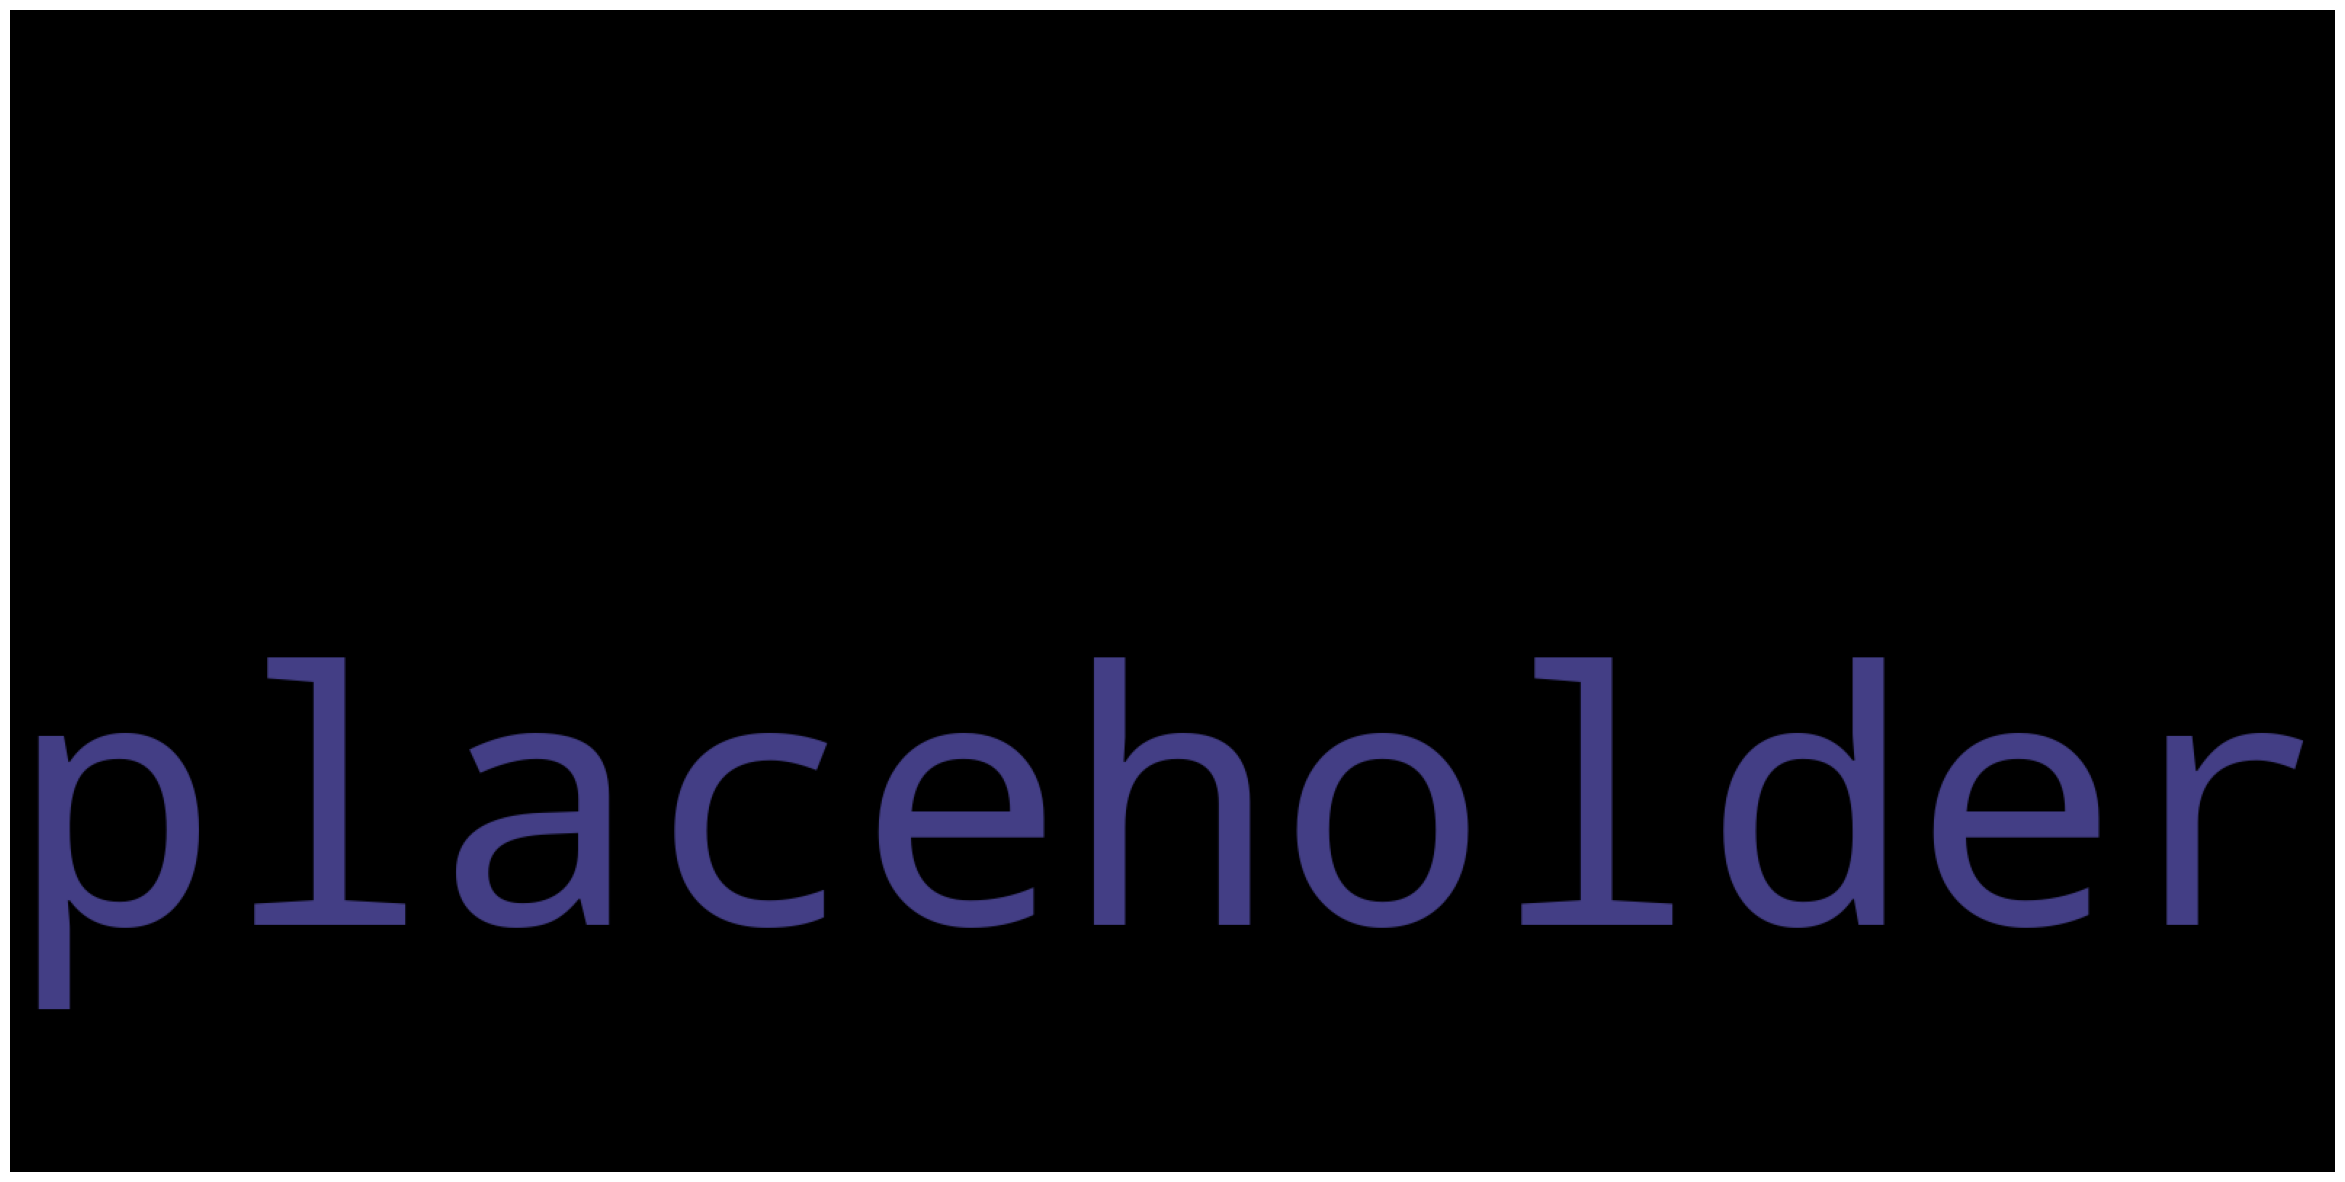

In [176]:
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

### Converting Text to Numerical vectors - Word2Vec Representation

**Step 1** - Import `Word2Vec` module from `gensim.models`  
**Step 2** - Convert the sentences to the List of Words (i.e. List of Tokens)  
**Step 3** - Use Word2Vec to learn numerical vectors for each unique words. Word2Vec uses the list of tokens and generate 300Dimensional numerical vector for each unique word.  
**Step 4** - Convert the word vectors to document vectors.

In [177]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",0,,0,,0
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",0,,0,,0
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",0,,0,,0
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",1,,0,,0
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c 2 mike roberts 9 : 30 am ebl 9 c 2 please mark your calendars . thanks ! shirley molly : do you have copies of the resumes for these two and the others that are being interviewed today and tomorrow ? thanks !",0,,0,,0


In [178]:
! pip install --upgrade gensim

In [179]:
import gensim

print(gensim.__version__)

4.3.3


In [180]:
from gensim.models import Word2Vec

In [181]:
X_train['tokenised_sentences'] = X_train.clean_text_lemma.apply(lambda sent : sent.split())

X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",0,,0,,0,[]
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",0,,0,,0,[]
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",0,,0,,0,[]
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",1,,0,,0,[]
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c 2 mike roberts 9 : 30 am ebl 9 c 2 please mark your calendars . thanks ! shirley molly : do you have copies of the resumes for these two and the others that are being interviewed today and tomorrow ? thanks !",0,,0,,0,

In [182]:
# train model

model = Word2Vec(list(X_train.tokenised_sentences), vector_size=300, min_count=1)

In [183]:
print(model)

Word2Vec<vocab=1, vector_size=300, alpha=0.025>


In [184]:
# Checking the shape of vectors learned by the model

print(model.wv.__getitem__(model.wv.index_to_key).shape)

(1, 300)


In [185]:
def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    if vocab_tokens:  # Check if vocab_tokens is not empty
        return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)
    else:
        # Return a zero vector or handle the empty case appropriately
        return np.zeros(keyed_vectors.vector_size)

In [186]:
X_train['doc_vector'] = X_train.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

100%|██████████| 4583/4583 [00:00<00:00, 410325.00it/s]


In [187]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",0,,0,,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",0,,0,,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",0,,0,,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",1,,0,,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c

In [188]:
X_train_w2v = list(X_train.doc_vector)

### Preprocessing the Test Data

In [189]:
X_test.head()

,text
"Subject: re : my son vince , i left a message with one of yaron ' s roommates on thursday afternoon for him to call asap for an interview on sunday . i guess he took the wrong number down but i do not understand this because the roommate read the number back to me and it was correct . when i did not hear from yaron i called on friday and left a voice mail with my cell and office numbers . i still did not hear from him and called again yesterday morning . i finally received a call at 4 pm yesterday but by that time my team and myself were half way back to houston . sorry it did not work out . i have a call into charlene jackson as to how she wants me to proceed and i will get back with you . kristin vince j kaminski @ ect 11 / 01 / 2000 08 : 40 am to : john goodpasture / ots / enron @ enron , kristin gandy / na / enron @ enron cc : subject : my son fyi vince - - - - - - - - - - - - - - - - - - - - - - forwarded by vince j kaminski / hou / ect on 11 / 01 / 2000 08 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - - "" shmuel oren "" on 10 / 31 / 2000 02 : 27 : 18 pm to : cc : subject : my son vince apparently the recruiter spoke to one of my son ' s roommates and left a phone number ( 713 ) 343 - 3214 which he tried several times and got busy signals . today she called just before you called me and left her cellphone number but he was in classes all morning and got the message in the afternoon . i really appreciate your going out of your ? way to help . perhaps there will be another opportunity . ? shmuel ?",0
"Subject: financial maths course , part 2 vince , just in case , here is a draft copy of the event for you to refer to . paul - finmathmail . doc",0
"Subject: june 21 - 22 retail electricity conference dear workshop participant : i hope you will be able to join us for the conference on "" retail participation in competitive power markets "" to be held at the littlefield conference center , stanford university , on june 21 - 22 , 2001 . conference attire will be business casual . the meeting will begin on thursday morning , june 21 , at 9 : 00 a . m . and will conclude by 5 : 00 p . m . on friday , june 22 . a continental breakfast will be available in the meeting room each morning beginning at 8 : 30 a . m . please visit the "" june 21 - 22 "" meeting under for a description of the meeting and some information about hotels . please help us in our planning by using the form there to respond back to emf about your participation . we have listed potential participants and planned presentations based upon previous messages . please update me with any additional presentations or changes in existing presentations . i look forward to seeing you in june . in the interim , please do not hesitate to call me or email me if you have questions or suggestions regarding this workshop . hill huntington hillard g . huntington emf - an international forum on energy and environmental markets voice : ( 650 ) 723 - 1050 408 terman center fax : ( 650 ) 725 - 5362 stanford university email : hillh @ stanford . edu stanford , ca 94305 - 4026 emf website : http : / / www . stanford . edu / group / emf /",0
"Subject: re : enron default swaps darrell , i am sending you 2 technical notes on enron default swaps : i hope that they will be useful . i shall read the articles on weekend . i am curious if you find these explanations satisfactory . we are very slow in preparing a number of technical documents for you for model reviews . we still hope you will be able to find some time to review our credit models ( for our london credit trading ) and var and option pricing related models . also , please check your invoices . i still think we owe you money . vince darrell duffie on 03 / 28 / 2001 08 : 07 : 38 am to : vince j kaminski cc : subject : re : enron default swaps vince : according to a bank of america publication , your ( enron ) default swap spreads are consistently trading about 80 basis points wider than your asset swaps . any id

In [190]:
temp_df = X_test['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████| 1146/1146 [00:00<00:00, 13373.90it/s]


,0,1
"Subject: re : my son vince , i left a message with one of yaron ' s roommates on thursday afternoon for him to call asap for an interview on sunday . i guess he took the wrong number down but i do not understand this because the roommate read the number back to me and it was correct . when i did not hear from yaron i called on friday and left a voice mail with my cell and office numbers . i still did not hear from him and called again yesterday morning . i finally received a call at 4 pm yesterday but by that time my team and myself were half way back to houston . sorry it did not work out . i have a call into charlene jackson as to how she wants me to proceed and i will get back with you . kristin vince j kaminski @ ect 11 / 01 / 2000 08 : 40 am to : john goodpasture / ots / enron @ enron , kristin gandy / na / enron @ enron cc : subject : my son fyi vince - - - - - - - - - - - - - - - - - - - - - - forwarded by vince j kaminski / hou / ect on 11 / 01 / 2000 08 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - - "" shmuel oren "" on 10 / 31 / 2000 02 : 27 : 18 pm to : cc : subject : my son vince apparently the recruiter spoke to one of my son ' s roommates and left a phone number ( 713 ) 343 - 3214 which he tried several times and got busy signals . today she called just before you called me and left her cellphone number but he was in classes all morning and got the message in the afternoon . i really appreciate your going out of your ? way to help . perhaps there will be another opportunity . ? shmuel ?",,0
"Subject: financial maths course , part 2 vince , just in case , here is a draft copy of the event for you to refer to . paul - finmathmail . doc",,0
"Subject: june 21 - 22 retail electricity conference dear workshop participant : i hope you will be able to join us for the conference on "" retail participation in competitive power markets "" to be held at the littlefield conference center , stanford university , on june 21 - 22 , 2001 . conference attire will be business casual . the meeting will begin on thursday morning , june 21 , at 9 : 00 a . m . and will conclude by 5 : 00 p . m . on friday , june 22 . a continental breakfast will be available in the meeting room each morning beginning at 8 : 30 a . m . please visit the "" june 21 - 22 "" meeting under for a description of the meeting and some information about hotels . please help us in our planning by using the form there to respond back to emf about your participation . we have listed potential participants and planned presentations based upon previous messages . please update me with any additional presentations or changes in existing presentations . i look forward to seeing you in june . in the interim , please do not hesitate to call me or email me if you have questions or suggestions regarding this workshop . hill huntington hillard g . huntington emf - an international forum on energy and environmental markets voice : ( 650 ) 723 - 1050 408 terman center fax : ( 650 ) 725 - 5362 stanford university email : hillh @ stanford . edu stanford , ca 94305 - 4026 emf website : http : / / www . stanford . edu / group / emf /",,0
"Subject: re : enron default swaps darrell , i am sending you 2 technical notes on enron default swaps : i hope that they will be useful . i shall read the articles on weekend . i am curious if you find these explanations satisfactory . we are very slow in preparing a number of technical documents for you for model reviews . we still hope you will be able to find some time to review our credit models ( for our london credit trading ) and var and option pricing related models . also , please check your invoices . i still think we owe you money . vince darrell duffie on 03 / 28 / 2001 08 : 07 : 38 am to : vince j kaminski cc : subject : re : enron default swaps vince : according to a bank of america publication , your ( enron ) default swap spreads are consistently trading about 80 basis points wider than your asset swaps . any 

In [191]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
"Subject: re : my son vince , i left a message with one of yaron ' s roommates on thursday afternoon for him to call asap for an interview on sunday . i guess he took the wrong number down but i do not understand this because the roommate read the number back to me and it was correct . when i did not hear from yaron i called on friday and left a voice mail with my cell and office numbers . i still did not hear from him and called again yesterday morning . i finally received a call at 4 pm yesterday but by that time my team and myself were half way back to houston . sorry it did not work out . i have a call into charlene jackson as to how she wants me to proceed and i will get back with you . kristin vince j kaminski @ ect 11 / 01 / 2000 08 : 40 am to : john goodpasture / ots / enron @ enron , kristin gandy / na / enron @ enron cc : subject : my son fyi vince - - - - - - - - - - - - - - - - - - - - - - forwarded by vince j kaminski / hou / ect on 11 / 01 / 2000 08 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - - "" shmuel oren "" on 10 / 31 / 2000 02 : 27 : 18 pm to : cc : subject : my son vince apparently the recruiter spoke to one of my son ' s roommates and left a phone number ( 713 ) 343 - 3214 which he tried several times and got busy signals . today she called just before you called me and left her cellphone number but he was in classes all morning and got the message in the afternoon . i really appreciate your going out of your ? way to help . perhaps there will be another opportunity . ? shmuel ?",,0
"Subject: financial maths course , part 2 vince , just in case , here is a draft copy of the event for you to refer to . paul - finmathmail . doc",,0
"Subject: june 21 - 22 retail electricity conference dear workshop participant : i hope you will be able to join us for the conference on "" retail participation in competitive power markets "" to be held at the littlefield conference center , stanford university , on june 21 - 22 , 2001 . conference attire will be business casual . the meeting will begin on thursday morning , june 21 , at 9 : 00 a . m . and will conclude by 5 : 00 p . m . on friday , june 22 . a continental breakfast will be available in the meeting room each morning beginning at 8 : 30 a . m . please visit the "" june 21 - 22 "" meeting under for a description of the meeting and some information about hotels . please help us in our planning by using the form there to respond back to emf about your participation . we have listed potential participants and planned presentations based upon previous messages . please update me with any additional presentations or changes in existing presentations . i look forward to seeing you in june . in the interim , please do not hesitate to call me or email me if you have questions or suggestions regarding this workshop . hill huntington hillard g . huntington emf - an international forum on energy and environmental markets voice : ( 650 ) 723 - 1050 408 terman center fax : ( 650 ) 725 - 5362 stanford university email : hillh @ stanford . edu stanford , ca 94305 - 4026 emf website : http : / / www . stanford . edu / group / emf /",,0
"Subject: re : enron default swaps darrell , i am sending you 2 technical notes on enron default swaps : i hope that they will be useful . i shall read the articles on weekend . i am curious if you find these explanations satisfactory . we are very slow in preparing a number of technical documents for you for model reviews . we still hope you will be able to find some time to review our credit models ( for our london credit trading ) and var and option pricing related models . also , please check your invoices . i still think we owe you money . vince darrell duffie on 03 / 28 / 2001 08 : 07 : 38 am to : vince j kaminski cc : subject : re : enron default swaps vince : according to a bank of america publication , your ( enron ) default swap spreads are consistently trading about 80 basis points wid

In [192]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,text,clean_text_lemma,text_length_lemma
"Subject: re : my son vince , i left a message with one of yaron ' s roommates on thursday afternoon for him to call asap for an interview on sunday . i guess he took the wrong number down but i do not understand this because the roommate read the number back to me and it was correct . when i did not hear from yaron i called on friday and left a voice mail with my cell and office numbers . i still did not hear from him and called again yesterday morning . i finally received a call at 4 pm yesterday but by that time my team and myself were half way back to houston . sorry it did not work out . i have a call into charlene jackson as to how she wants me to proceed and i will get back with you . kristin vince j kaminski @ ect 11 / 01 / 2000 08 : 40 am to : john goodpasture / ots / enron @ enron , kristin gandy / na / enron @ enron cc : subject : my son fyi vince - - - - - - - - - - - - - - - - - - - - - - forwarded by vince j kaminski / hou / ect on 11 / 01 / 2000 08 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - - "" shmuel oren "" on 10 / 31 / 2000 02 : 27 : 18 pm to : cc : subject : my son vince apparently the recruiter spoke to one of my son ' s roommates and left a phone number ( 713 ) 343 - 3214 which he tried several times and got busy signals . today she called just before you called me and left her cellphone number but he was in classes all morning and got the message in the afternoon . i really appreciate your going out of your ? way to help . perhaps there will be another opportunity . ? shmuel ?",0,,0
"Subject: financial maths course , part 2 vince , just in case , here is a draft copy of the event for you to refer to . paul - finmathmail . doc",0,,0
"Subject: june 21 - 22 retail electricity conference dear workshop participant : i hope you will be able to join us for the conference on "" retail participation in competitive power markets "" to be held at the littlefield conference center , stanford university , on june 21 - 22 , 2001 . conference attire will be business casual . the meeting will begin on thursday morning , june 21 , at 9 : 00 a . m . and will conclude by 5 : 00 p . m . on friday , june 22 . a continental breakfast will be available in the meeting room each morning beginning at 8 : 30 a . m . please visit the "" june 21 - 22 "" meeting under for a description of the meeting and some information about hotels . please help us in our planning by using the form there to respond back to emf about your participation . we have listed potential participants and planned presentations based upon previous messages . please update me with any additional presentations or changes in existing presentations . i look forward to seeing you in june . in the interim , please do not hesitate to call me or email me if you have questions or suggestions regarding this workshop . hill huntington hillard g . huntington emf - an international forum on energy and environmental markets voice : ( 650 ) 723 - 1050 408 terman center fax : ( 650 ) 725 - 5362 stanford university email : hillh @ stanford . edu stanford , ca 94305 - 4026 emf website : http : / / www . stanford . edu / group / emf /",0,,0
"Subject: re : enron default swaps darrell , i am sending you 2 technical notes on enron default swaps : i hope that they will be useful . i shall read the articles on weekend . i am curious if you find these explanations satisfactory . we are very slow in preparing a number of technical documents for you for model reviews . we still hope you will be able to find some time to review our credit models ( for our london credit trading ) and var and option pricing related models . also , please check your invoices . i still think we owe you money . vince darrell duffie on 03 / 28 / 2001 08 : 07 : 38 am to : vince j kaminski cc : subject : re : enron default swaps vince : according to a bank of america publication , your ( enron ) default swap spreads are consistently trading about 80 basis

In [193]:
X_test['tokenised_sentences'] = X_test.clean_text_lemma.apply(lambda sent : sent.split())

X_test.head()

,text,clean_text_lemma,text_length_lemma,tokenised_sentences
"Subject: re : my son vince , i left a message with one of yaron ' s roommates on thursday afternoon for him to call asap for an interview on sunday . i guess he took the wrong number down but i do not understand this because the roommate read the number back to me and it was correct . when i did not hear from yaron i called on friday and left a voice mail with my cell and office numbers . i still did not hear from him and called again yesterday morning . i finally received a call at 4 pm yesterday but by that time my team and myself were half way back to houston . sorry it did not work out . i have a call into charlene jackson as to how she wants me to proceed and i will get back with you . kristin vince j kaminski @ ect 11 / 01 / 2000 08 : 40 am to : john goodpasture / ots / enron @ enron , kristin gandy / na / enron @ enron cc : subject : my son fyi vince - - - - - - - - - - - - - - - - - - - - - - forwarded by vince j kaminski / hou / ect on 11 / 01 / 2000 08 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - - "" shmuel oren "" on 10 / 31 / 2000 02 : 27 : 18 pm to : cc : subject : my son vince apparently the recruiter spoke to one of my son ' s roommates and left a phone number ( 713 ) 343 - 3214 which he tried several times and got busy signals . today she called just before you called me and left her cellphone number but he was in classes all morning and got the message in the afternoon . i really appreciate your going out of your ? way to help . perhaps there will be another opportunity . ? shmuel ?",0,,0,[]
"Subject: financial maths course , part 2 vince , just in case , here is a draft copy of the event for you to refer to . paul - finmathmail . doc",0,,0,[]
"Subject: june 21 - 22 retail electricity conference dear workshop participant : i hope you will be able to join us for the conference on "" retail participation in competitive power markets "" to be held at the littlefield conference center , stanford university , on june 21 - 22 , 2001 . conference attire will be business casual . the meeting will begin on thursday morning , june 21 , at 9 : 00 a . m . and will conclude by 5 : 00 p . m . on friday , june 22 . a continental breakfast will be available in the meeting room each morning beginning at 8 : 30 a . m . please visit the "" june 21 - 22 "" meeting under for a description of the meeting and some information about hotels . please help us in our planning by using the form there to respond back to emf about your participation . we have listed potential participants and planned presentations based upon previous messages . please update me with any additional presentations or changes in existing presentations . i look forward to seeing you in june . in the interim , please do not hesitate to call me or email me if you have questions or suggestions regarding this workshop . hill huntington hillard g . huntington emf - an international forum on energy and environmental markets voice : ( 650 ) 723 - 1050 408 terman center fax : ( 650 ) 725 - 5362 stanford university email : hillh @ stanford . edu stanford , ca 94305 - 4026 emf website : http : / / www . stanford . edu / group / emf /",0,,0,[]
"Subject: re : enron default swaps darrell , i am sending you 2 technical notes on enron default swaps : i hope that they will be useful . i shall read the articles on weekend . i am curious if you find these explanations satisfactory . we are very slow in preparing a number of technical documents for you for model reviews . we still hope you will be able to find some time to review our credit models ( for our london credit trading ) and var and option pricing related models . also , please check your invoices . i still think we owe you money . vince darrell duffie on 03 / 28 / 2001 08 : 07 : 38 am to : vince j kaminski cc : subject : re : enron default swaps vince : according to a bank of america publication , your ( enron ) default swap spreads are consis

In [194]:
X_test['doc_vector'] = X_test.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

100%|██████████| 1146/1146 [00:00<00:00, 238355.27it/s]


In [195]:
X_test.head()

,text,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector
"Subject: re : my son vince , i left a message with one of yaron ' s roommates on thursday afternoon for him to call asap for an interview on sunday . i guess he took the wrong number down but i do not understand this because the roommate read the number back to me and it was correct . when i did not hear from yaron i called on friday and left a voice mail with my cell and office numbers . i still did not hear from him and called again yesterday morning . i finally received a call at 4 pm yesterday but by that time my team and myself were half way back to houston . sorry it did not work out . i have a call into charlene jackson as to how she wants me to proceed and i will get back with you . kristin vince j kaminski @ ect 11 / 01 / 2000 08 : 40 am to : john goodpasture / ots / enron @ enron , kristin gandy / na / enron @ enron cc : subject : my son fyi vince - - - - - - - - - - - - - - - - - - - - - - forwarded by vince j kaminski / hou / ect on 11 / 01 / 2000 08 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - - "" shmuel oren "" on 10 / 31 / 2000 02 : 27 : 18 pm to : cc : subject : my son vince apparently the recruiter spoke to one of my son ' s roommates and left a phone number ( 713 ) 343 - 3214 which he tried several times and got busy signals . today she called just before you called me and left her cellphone number but he was in classes all morning and got the message in the afternoon . i really appreciate your going out of your ? way to help . perhaps there will be another opportunity . ? shmuel ?",0,,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"Subject: financial maths course , part 2 vince , just in case , here is a draft copy of the event for you to refer to . paul - finmathmail . doc",0,,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"Subject: june 21 - 22 retail electricity conference dear workshop participant : i hope you will be able to join us for the conference on "" retail participation in competitive power markets "" to be held at the littlefield conference center , stanford university , on june 21 - 22 , 2001 . conference attire will be business casual . the meeting will begin on thursday morning , june 21 , at 9 : 00 a . m . and will conclude by 5 : 00 p . m . on friday , june 22 . a continental breakfast will be available in the meeting room each morning beginning at 8 : 30 a . m . please visit the "" june 21 - 22 "" meeting under for a description of the meeting and some information about hotels . please help us in our planning by using the form there to respond back to emf about your participation . we have listed potential participants and planned presentations based upon previous messages . please update me with any additional presentations or changes in existing presentations . i look forward to seeing you in june . in the interim , please do not hesitate to call me or email me if you have questions or suggestions regarding this workshop . hill huntington hillard g . huntington emf - an international forum on energy and environmental markets voice : ( 650 ) 723 - 1050 408 terman center fax : ( 650 ) 725 - 5362 stanford university email : hillh @ stanford . edu stanford , ca 94305 - 4026 emf website : http : / / www . stanford . edu / group / emf /",0,,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"Subject: re : enron default swaps darrell , i am sending you 2 technical notes on enron default swaps : i hope that they will be useful . i shall read the articles on weekend . i am curious if you find these explanations satisfactory . we are very slow in preparing a number of technical documents for you for model reviews . we still hope you will be able to find some time to review our credit models ( for our london credit trading ) and var and option pricing related models . also , please check your invoices . i still think we owe you money . vince darrell duffie on 03 / 28 / 2001 08 : 07 : 

In [196]:
X_test_w2v = list(X_test.doc_vector)

### Logistic Regression

In [211]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_w2v, y_train)

Shape of X before splitting: (5729, 1)
Shape of y before splitting: (5729,)
Shape of X_train after splitting: (4583,)
Shape of y_train after splitting: (4583,)
Length of X_train_w2v: 0
First element of X_train_w2v (if any): None


<ipython-input-211-cebea53b10fc>:20: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  print(f"First element of X_train_w2v (if any): {X_train_w2v[0] if X_train_w2v else None}")


ValueError: Found array with 0 sample(s) (shape=(0, 300)) while a minimum of 1 is required by LogisticRegression.

In [210]:
y_test_pred = classifier.predict(X_test_w2v)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_w2v, y_train)

In [ ]:
y_test_pred = classifier.predict(X_test_w2v)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_w2v, y_train)

In [ ]:
y_test_pred = classifier.predict(X_test_w2v)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

## Pretrained GloVe for Sentence Vector

In [ ]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

In [ ]:
wv = api.load('glove-twitter-50')

# # Approax 200MB Size
# # Save Embeddings
# wv.save('embeddings/50d_glove_vec.kv')

# Load Embeddings
# from gensim.models import KeyedVectors
# wv = KeyedVectors.load('embeddings/50d_glove_vec.kv')

In [ ]:
# Total number of vocabulary words in pretrained model

len(wv.index_to_key)

In [ ]:
X_train.head()

In [ ]:
X_train['doc_vector_pretrained_glove'] = X_train.tokenised_sentences.progress_apply(lambda x : document_vector(x, wv))

# 20 - 30 mins Run Time

In [ ]:
X_train.head()

In [ ]:
X_train_glove_pretrained = list(X_train.doc_vector_pretrained_glove)

In [ ]:
X_test.head()

In [ ]:
X_test['doc_vector_pretrained_glove'] = X_test.tokenised_sentences.progress_apply(lambda x : document_vector(x, wv))

In [ ]:
X_test_glove_pretrained = list(X_test.doc_vector_pretrained_glove)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

In [ ]:
X_train.doc_vector.values[1].shape

In [ ]:
X_train.doc_vector_pretrained_glove.values[1].shape

## Pretrained BERT for Sentence Vectors

In [ ]:
! pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
X_train.head()

In [ ]:
X_train['doc_vector_pretrained_bert'] = X_train.clean_text_lemma.progress_apply(model.encode)

X_train.head()

In [ ]:
X_train_bert_pretrained = list(X_train.doc_vector_pretrained_bert)

In [ ]:
X_test['doc_vector_pretrained_bert'] = X_test.clean_text_lemma.progress_apply(model.encode)

In [ ]:
X_test_bert_pretrained = list(X_test.doc_vector_pretrained_bert)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

In [ ]:
X_train.doc_vector_pretrained_bert.values[1].shape

## Visualization for W2V Embeddings

In [205]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector
"Subject: re : request for payroll reclassification - approved joann , yes , sorry . 413 was the number on the form i received . vince enron property & services corp . from : joann holloway 01 / 11 / 2000 02 : 01 pm to : vince j kaminski / hou / ect @ ect cc : subject : re : request for payroll reclassification - approved vince , on your reclass information , the company number indicated should be 0011 not 413 . jo ann holloway x 35957 vince j kaminski 01 / 11 / 2000 01 : 33 pm to : stella l ely / hou / ect @ ect cc : jeff kinneman / hou / ect @ ect , carmen chavira / hou / ect @ ect , michelle hargrave / hou / ect @ ect , stephen wolfe / hou / ect @ ect , michael s galvan / hou / ect @ ect , gary mccumber / hou / ect @ ect , billie akhave / epsc / hou / ect @ ect , joann holloway / epsc / hou / ect @ ect , louis allen / epsc / hou / ect @ ect , bradley stewart / hou / ect @ ect , carol coats / hou / ect @ ect subject : request for payroll reclassification - approved the following payroll reclassification request has been approved . click on this link to view document - - >",0,,0,,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"Subject: re : other matters kate wagner is setting up a happy hr . for him on friday . i will let you know details . also , i think andrea is having a brunch on sunday . mr vince j kaminski 04 / 27 / 2000 07 : 22 am to : mark ruane / hou / ect @ ect cc : vince j kaminski / hou / ect @ ect subject : re : other matters mark , i called rick to let him know . it ' s not an interview yet . aram is coming for a wedding but i think he wants to explore the opportunity of coming back to enron . the conversation may lead to an interview at some point . he will talk to andrea as well . do you plan to organize something for aram ? i would be glad to join . vince from : mark ruane 04 / 26 / 2000 05 : 53 pm to : vince j kaminski / hou / ect @ ect cc : subject : other matters i heard that you were going to be interviewing aram ? what ' s the job ? mark",0,,0,,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"Subject: re : statistician from rice osman , this guy is too much . i would tell him that we understand that he has to make the best choice for himself and can change his mind but at this point we treat his decision as final but we still appreciate the interest he showed in enron . we never had any luck hiring a statistician . maybe we shall get one some day . vince osman sezgen @ ees 04 / 20 / 2001 11 : 54 am to : vince j kaminski / hou / ect @ ect , pinnamaneni krishnarao / hou / ect @ ect cc : subject : statistician from rice i had a message on my phone this morning from william indicating that he had changed his mind and will be taking another job . he also mentions that the other organization will give him time to publish his thesis and he assumes enron would not do that . i am inclined to give up on him but wanted to get your input before doing so . osman",0,,0,,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"Subject: v foorever hello , welcome to pha russian rmonline sho inwove p - one of the leading oniine pharmace clonus utical shops affective v eventual g a intercommunication l exterminate ll l severely a r altruist ac anticlimax l booster is victor va u aggregate m andmanyother . - save o gryphon ver 50 % - worldwide gripsack shlpplng - total confidentiaii hayrick ty - over 5 miiiion customers in 130 count puerile ries spontaneity have a nice day !",1,,0,,0,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
"Subject: interviews scheduled for monday , november 6 th ( gary hickerson ' s position ) good morning all : below are two more candidates for gary hickerson ' s tech position . they will be here monday , november 6 th for interviews . cynthia shanley vince kaminski 8 : 30 am ebl 938 mike roberts 9 : 00 am ebl 938 christopher burford vince kaminski 9 : 00 am ebl 9 c

In [ ]:
X_train.columns

In [ ]:
w2v_embeddings = np.array(X_train['doc_vector'].tolist())

w2v_embeddings.shape

In [ ]:
labels = y_train.apply(lambda x : 1 if x=='ham' else 0)

len(labels)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(w2v_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

In [ ]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=0, n_iter=1000)

# tsne_data = tsne.fit_transform(w2v_embeddings)

# tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
# tsne_df["labels"] = labels

# plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
# plt.show()

## Visualization for Pretrained GloVe Embeddings

In [ ]:
X_train.columns

In [ ]:
pretrained_glove_embeddings = np.array(X_train['doc_vector_pretrained_glove'].tolist())

pretrained_glove_embeddings.shape

In [ ]:
labels = y_train.apply(lambda x : 1 if x=='ham' else 0)

len(labels)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(pretrained_glove_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

In [ ]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=0, n_iter=1000)

# tsne_data = tsne.fit_transform(pretrained_glove_embeddings)

# tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
# tsne_df["labels"] = labels

# plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
# plt.show()

## Visualization for Pretrained BERT Embeddings

In [207]:
X_train.columns

Index(['text', 'clean_text_stem', 'text_length_stem', 'clean_text_lemma',
       'text_length_lemma', 'tokenised_sentences', 'doc_vector'],
      dtype='object')

In [208]:
pretrained_bert_embeddings = np.array(X_train['doc_vector_pretrained_bert'].tolist())

pretrained_bert_embeddings.shape

KeyError: 'doc_vector_pretrained_bert'

In [ ]:
labels = y_train.apply(lambda x : 1 if x=='ham' else 0)

len(labels)

In [206]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(pretrained_bert_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

NameError: name 'pretrained_bert_embeddings' is not defined

In [ ]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=0, n_iter=300)

# tsne_data = tsne.fit_transform(pretrained_bert_embeddings)

# tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
# tsne_df["labels"] = labels

# plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
# plt.show()